In [45]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [46]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)

In [47]:
u @ u.T.conjugate()         # u is unitary. Its columns are left singular vectors

array([[1.+0.j, 0.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.-0.j, 0.-0.j],
       [0.-0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.-0.j, 0.+0.j, 0.-0.j, 1.+0.j]])

In [48]:
vh @ vh.T.conjugate()       # Rows of vh are right singular vectors

array([[ 1.+0.j,  0.-0.j, -0.+0.j,  0.-0.j,  0.-0.j],
       [ 0.+0.j,  1.+0.j,  0.-0.j,  0.+0.j, -0.-0.j],
       [-0.-0.j,  0.+0.j,  1.+0.j,  0.-0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.-0.j],
       [ 0.+0.j, -0.+0.j, -0.-0.j,  0.+0.j,  1.+0.j]])

In [49]:
s       # Only the diagonal entries of Sigma are returned in s

array([3.588, 1.026, 0.774, 0.426])

In [50]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)

In [51]:
u[0, :, np.newaxis] @ vh[np.newaxis, 0, :]

array([[ 0.09 ,  0.289,  0.197,  0.28 ,  0.225],
       [ 0.087,  0.279,  0.19 ,  0.271,  0.218],
       [-0.016, -0.052, -0.035, -0.05 , -0.04 ],
       [-0.124, -0.397, -0.27 , -0.385, -0.309]])

In [52]:
np.outer(u[0, :], vh[0, :])


array([[ 0.09 ,  0.289,  0.197,  0.28 ,  0.225],
       [ 0.087,  0.279,  0.19 ,  0.271,  0.218],
       [-0.016, -0.052, -0.035, -0.05 , -0.04 ],
       [-0.124, -0.397, -0.27 , -0.385, -0.309]])

In [53]:
ar = np.zeros_like(a)
for i in range(4):
    ar += np.outer(u[:, i], s[i] * vh[i, :])

In [54]:
a - ar      # a and ar are identical

array([[ 0.,  0., -0.,  0.,  0.],
       [ 0., -0.,  0.,  0., -0.],
       [-0.,  0.,  0., -0.,  0.],
       [-0.,  0.,  0., -0., -0.]])

In [55]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

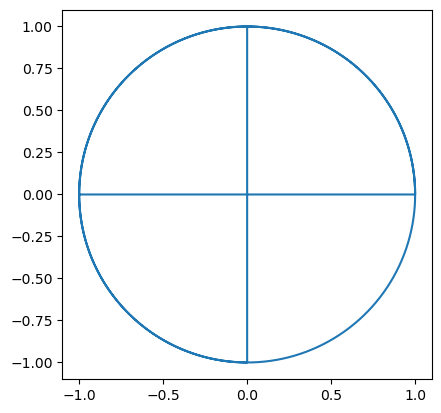

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

def show(c):
    plt.plot(c[0, :], c[1, :])
    plt.axis('image');


# plot the unit circle and axis segments:

t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]),np.concatenate([z, np.sin(t), l])])

show(c)

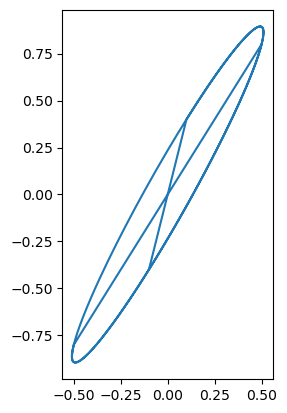

In [57]:
show(a @ c)

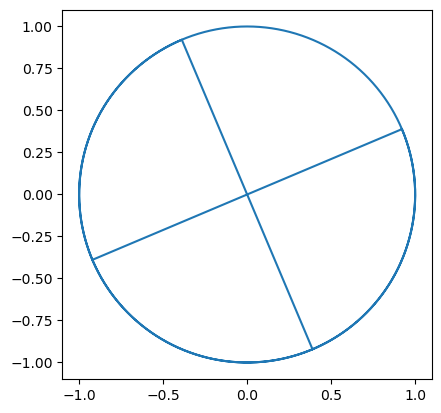

In [58]:
show(vh @ c)

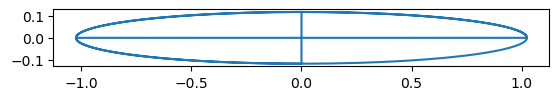

In [59]:
show(np.diag(s) @ c)

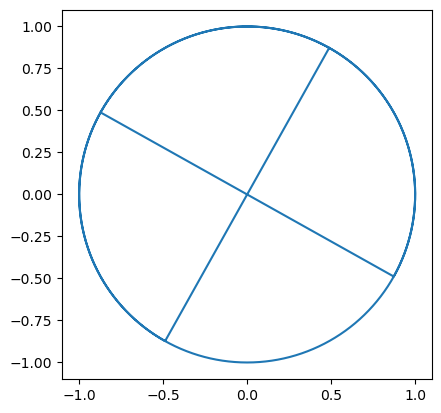

In [60]:
show(u @ c)

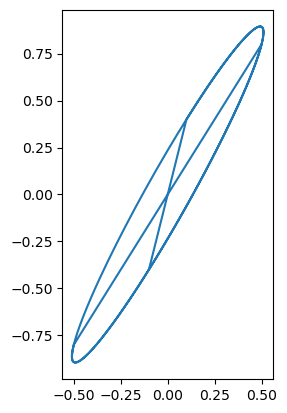

In [61]:
show(u @ np.diag(s) @ vh @ c)

In [62]:
cats = plt.imread('../images/sivaambi.png')
cats.shape

(395, 281, 4)

In [63]:
np.linalg.norm(cats[..., 0] - cats[..., 2], 'fro')

53.500317

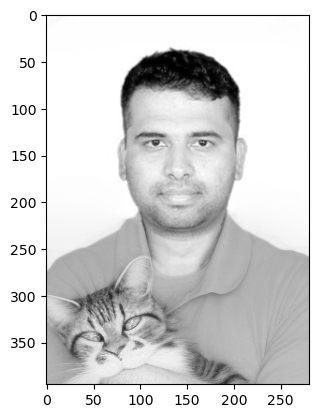

In [64]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');

In [65]:
u, s, vh = svd(c)

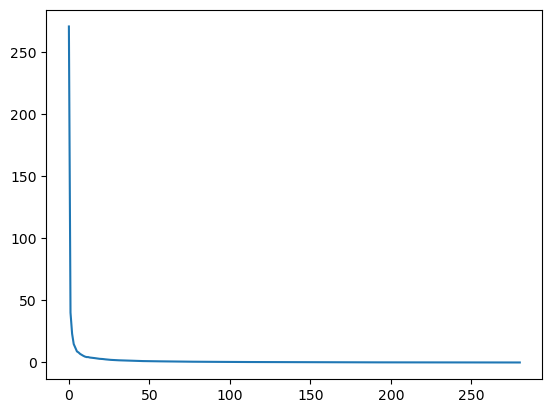

In [66]:
plt.plot(s);

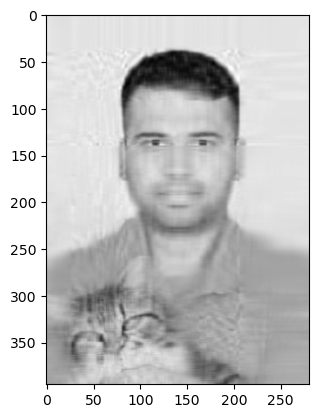

In [67]:
# Rank 20 approximation of the cat:

l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

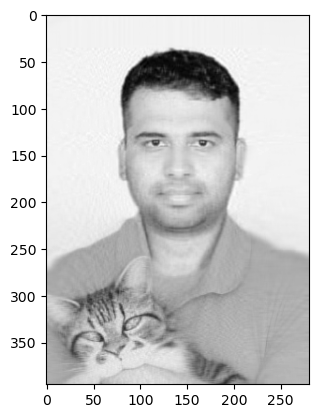

In [68]:
# Rank 50 approximation of the cat:

l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [69]:
relative_error = 1.e-1

In [70]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total - np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

4

In [71]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [72]:
np.linalg.norm(c - cl, 'fro') / np.linalg.norm(c, 'fro')

0.09387912

In [73]:
u.shape[0] * l + l + l * vh.shape[0]

2708

In [74]:
c.shape[0] * c.shape[1]

110995